In [1]:
import yfinance as yf
import pandas as pd

# Define a function to fetch earnings data for multiple tickers
def get_earnings_data(tickers):
    all_data = []
    
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        data = stock.earnings_dates
        
        # Add a column for the ticker to differentiate data
        data['Ticker'] = ticker
        all_data.append(data)
    
    # Concatenate all data into a single DataFrame
    combined_data = pd.concat(all_data)
    return combined_data

# Test with a few stocks
tickers = ["ASC", "AXR", "CHCI", "EGY", "GAMB", "IDR", "MDXG", "OPXS", "RDVT"]
earnings_data = get_earnings_data(tickers)

# Display or save the data
print(earnings_data)

                           EPS Estimate  Reported EPS  Surprise(%) Ticker
Earnings Date                                                            
2024-07-31 08:00:00-04:00          1.02          1.13       0.1046    ASC
2024-05-08 08:00:00-04:00          0.83          0.92       0.1034    ASC
2024-02-15 08:00:00-05:00          0.62          0.63       0.0099    ASC
2023-11-07 08:00:00-05:00          0.44          0.49       0.1172    ASC
2023-08-01 08:00:00-04:00          0.56          0.57       0.0215    ASC
...                                 ...           ...          ...    ...
2025-08-05 06:00:00-04:00           NaN           NaN          NaN   RDVT
2025-05-06 06:00:00-04:00           NaN           NaN          NaN   RDVT
2025-03-05 16:00:00-05:00           NaN           NaN          NaN   RDVT
2024-11-05 16:00:00-05:00          0.23           NaN          NaN   RDVT
2024-08-07 16:00:00-04:00           NaN           NaN          NaN   RDVT

[101 rows x 4 columns]


In [2]:
df=earnings_data

In [3]:
# Step 1: Identify reported EPS rows
reported_eps_rows = df[df['Reported EPS'].notna()]

# Step 2: Identify the most recent unreported EPS row (where Reported EPS is NaN)
unreported_eps_rows = df[df['Reported EPS'].isna()]
most_recent_unreported = unreported_eps_rows.head(1)

# Step 3: Concatenate reported EPS rows with the most recent unreported EPS row
result = pd.concat([reported_eps_rows, most_recent_unreported])

# Display the result
print(result)

                           EPS Estimate  Reported EPS  Surprise(%) Ticker
Earnings Date                                                            
2024-07-31 08:00:00-04:00          1.02          1.13       0.1046    ASC
2024-05-08 08:00:00-04:00          0.83          0.92       0.1034    ASC
2024-02-15 08:00:00-05:00          0.62          0.63       0.0099    ASC
2023-11-07 08:00:00-05:00          0.44          0.49       0.1172    ASC
2023-08-01 08:00:00-04:00          0.56          0.57       0.0215    ASC
2023-05-09 08:00:00-04:00          1.00          1.04       0.0348    ASC
2023-02-14 08:00:00-05:00          1.24          1.30       0.0456    ASC
2022-11-02 08:00:00-04:00          1.43          1.54       0.0771    ASC
2022-07-27 08:00:00-04:00          0.68          0.81       0.1881    ASC
2022-05-04 08:00:00-04:00         -0.15         -0.03       0.7945    ASC
2022-02-15 08:00:00-05:00         -0.24         -0.26      -0.0911    ASC
2021-11-10 08:00:00-05:00         -0.3

In [4]:
df=unreported_eps_rows

In [5]:
# Filter rows where "EPS Estimate" is not NaN
df_with_estimate = df[df['EPS Estimate'].notna()]

# Display the result
print(df_with_estimate)

                           EPS Estimate  Reported EPS  Surprise(%) Ticker
Earnings Date                                                            
2024-11-05 05:00:00-05:00          0.17           NaN          NaN    EGY
2024-11-04 08:00:00-05:00          0.20           NaN          NaN    IDR
2024-10-28 06:00:00-04:00          0.04           NaN          NaN   MDXG
2023-08-01 16:00:00-04:00         -0.02           NaN          1.0   MDXG
2024-11-05 16:00:00-05:00          0.23           NaN          NaN   RDVT


In [6]:
df_with_estimate

,EPS Estimate,Reported EPS,Surprise(%),Ticker
Earnings Date,,,,
2024-11-05 05:00:00-05:00,0.17,NaN,NaN,EGY
2024-11-04 08:00:00-05:00,0.20,NaN,NaN,IDR
2024-10-28 06:00:00-04:00,0.04,NaN,NaN,MDXG
2023-08-01 16:00:00-04:00,-0.02,NaN,1.0,MDXG
2024-11-05 16:00:00-05:00,0.23,NaN,NaN,RDVT


C:\Users\nilee\AppData\Local\Temp\ipykernel_18148\808038074.py:13: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-', color='black')
C:\Users\nilee\AppData\Local\Temp\ipykernel_18148\808038074.py:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-', color='black')


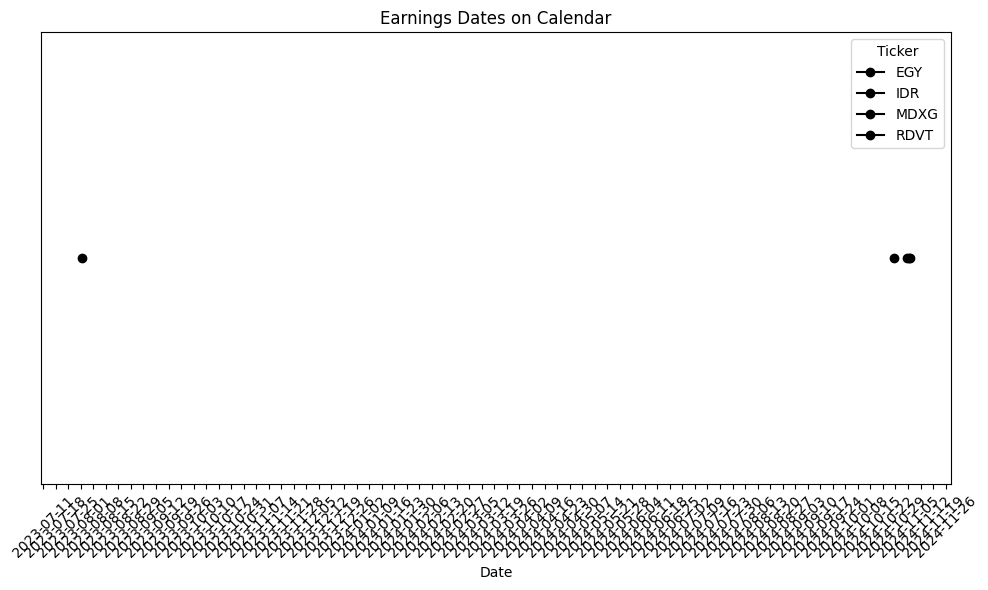

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample DataFrame
df=df_with_estimate

# Plot the dates on a calendar
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each point with corresponding labels (tickers)
for idx, row in df.iterrows():
    ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-', color='black')

# Format the x-axis as dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title("Earnings Dates on Calendar")
plt.xlabel("Date")
plt.yticks([])  # Hide the y-axis as it's not necessary in this case

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title="Ticker")

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\nilee\AppData\Local\Temp\ipykernel_18148\366508906.py:10: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')
C:\Users\nilee\AppData\Local\Temp\ipykernel_18148\366508906.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')


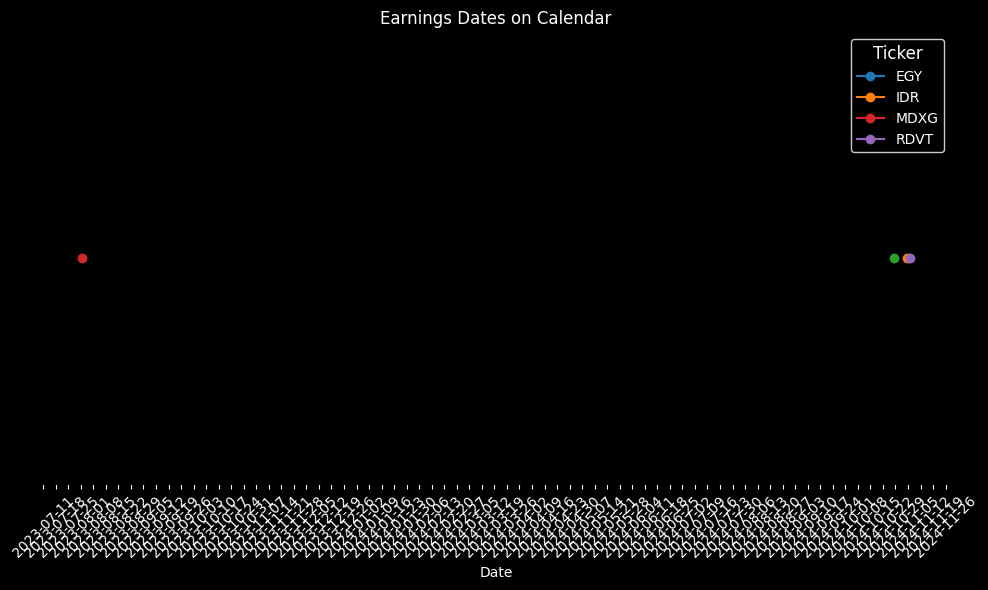

In [8]:
# Plot the dates on a calendar
fig, ax = plt.subplots(figsize=(10, 6))

# Set black background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Plot each point with corresponding labels (tickers), letting matplotlib assign colors
for idx, row in df.iterrows():
    ax.plot_date(idx, 1, marker='o', label=row['Ticker'], linestyle='-')

# Format the x-axis as dates
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Customize title, labels, and ticks for better readability on a black background
plt.title("Earnings Dates on Calendar", color='white')
plt.xlabel("Date", color='white')
ax.tick_params(axis='x', colors='white')
plt.yticks([])  # Hide the y-axis as it's not necessary in this case

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Add legend without pre-assigned colors
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
legend = ax.legend(unique_labels.values(), unique_labels.keys(), title="Ticker", facecolor='black', edgecolor='white', title_fontsize='large')
plt.setp(legend.get_texts(), color='white')  # Set the legend text color to white
plt.setp(legend.get_title(), color='white')  # Set the legend title color to white

# Show the plot
plt.tight_layout()
plt.show()